Johannes Schade (5564109)

Yolanda Seifert (5477060)

David Bauer (5398867)

"The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc.."
The dataset was drawn from the 1994 United States Census Bureau data and is credited to Ronny Kohavi and Barry Becker. 


*   Target field: Income (The income is divide into two classes: <=50K and >50K )
*   A certain number of attributes (variables): These are the demographics and other features to describe a person

For more information regarding the dataset see [Adult income](https://archive.ics.uci.edu/ml/datasets/adult)


Code for importing the required packages (is given)

In [1]:
import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import Input, Model, layers, losses, optimizers, callbacks

The Url and column names of the dataset are given. Read this dataset into a pandas dataframe and store it as a csv file. 

In [2]:
# load the dataset
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status',
                'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country','income']


df = pd.read_csv(url_data, names=column_names)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Provide a **description** of the dataset in pandas

In [3]:
# Describe the dataframe

df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Find out and print the unique values per column 

In [4]:
# Print out unique values per column

for col, data in df.items() :
    out = pd.unique(data)
    print(col, len(out) ,'\n' ,out, '\n')

age 73 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass 9 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt 21648 
 [ 77516  83311 215646 ...  34066  84661 257302] 

education 16 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

educational-num 16 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status 7 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation 15 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' '

Compare the columns 'education' and 'educational-num', drop the column 'education'.

In [5]:
df['education'].compare(df['educational-num'])

df = df.drop('education', axis=1)

Remove whitespaces at the beginning and end of all attributes of type String and drop the rows containing '?'

In [6]:
# Drop rows containing '?'
df = df.applymap(lambda x : x.strip() if isinstance(x, str) else x)
    
df['native-country'].unique()

#df['native-country'].str.contains('?', regex=False)
mask = (df == '?').any(axis=1)

df = df.drop(df[mask].index)


Provide a **description** of your dataframe again. Did the number of rows reduce?

In [7]:
# A description of your dataframe
df.describe()
# We dropped around 20.000 rows

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Make a new column with 'age-groups' and drop 'age'


In [8]:
# Make new column with 'age-groups' and drop 'age'
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]

df['age-groups'] = pd.cut(df.age, age_bins, right=True)
df = df.drop('age', axis = 1)


In [9]:
df.describe()

,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Print two lists containing:


*   Only numerical columns
*   Only Categorical columns




In [10]:
# get new columns, cat and num cols
df['educational-num'] = df['educational-num'].astype('category')
num_col = df.select_dtypes(include='number')
cat_col = df.select_dtypes(exclude='number')

num_col.describe()


,fnlwgt,capital-gain,capital-loss,hours-per-week
count,3.016200e+04,30162.000000,30162.000000,30162.000000
mean,1.897938e+05,1092.007858,88.372489,40.931238
std,1.056530e+05,7406.346497,404.298370,11.979984
min,1.376900e+04,0.000000,0.000000,1.000000
25%,1.176272e+05,0.000000,0.000000,40.000000
50%,1.784250e+05,0.000000,0.000000,40.000000
75%,2.376285e+05,0.000000,0.000000,45.000000
max,1.484705e+06,99999.000000,4356.000000,99.000000


In [11]:
cat_col.describe()

,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income,age-groups
count,30162,30162,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41,2,7
top,Private,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K,"(25, 35]"
freq,22286,9840,14065,4038,12463,25933,20380,27504,22654,8070


Normalize all numerical columns

In [12]:
# Normalize all numerical columns
scaler = MinMaxScaler()
#num_col.apply(lambda x : scaler.fit_transform(x))
num_col[num_col.columns] = scaler.fit_transform(num_col[num_col.columns])
num_col.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,fnlwgt,capital-gain,capital-loss,hours-per-week
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,0.119669,0.010920,0.020288,0.407462
std,0.071827,0.074064,0.092814,0.122245
min,0.000000,0.000000,0.000000,0.000000
25%,0.070607,0.000000,0.000000,0.397959
50%,0.111940,0.000000,0.000000,0.397959
75%,0.152188,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000


Plot the column distributions (one plot for each column)
* Hint: lookup [Seaborn histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) for numerical columns
* Hint: lookup [Seaborn countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) for categorical columns

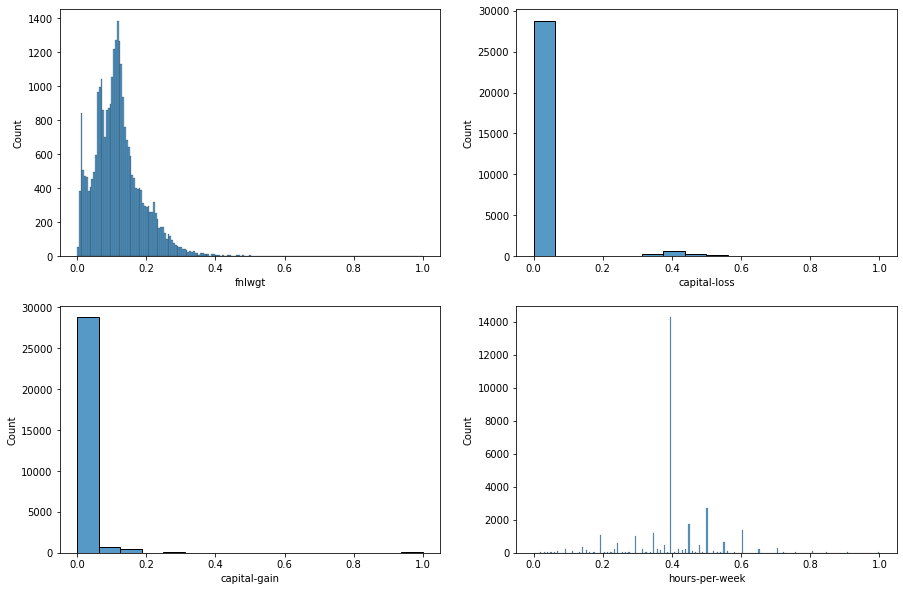

In [13]:
# Plot distributions of columns
fig, ax = plt.subplots(2, 2, figsize=(15,10))

for i, c in enumerate(num_col.columns) :
    sns.histplot(data=num_col, x=c, ax=ax[i % 2][i // 2])



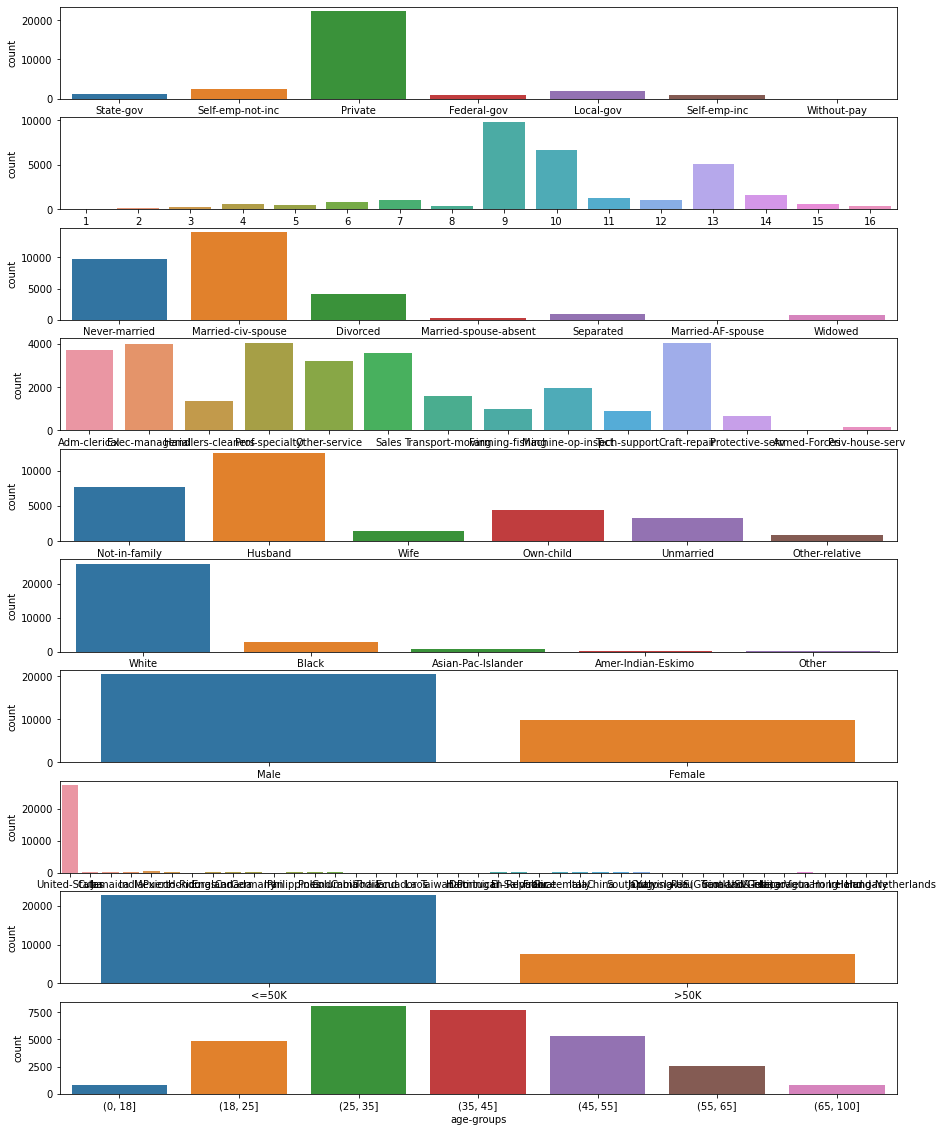

In [14]:
fig, ax = plt.subplots(10, 1, figsize=(15,20))

for i, c in enumerate(cat_col.columns) :
    sns.countplot(data=cat_col, x=c, ax=ax[i])



Label encode your categorical columns and print label encodings for each variable

In [15]:
# Label encoding of categorical columns
from sklearn.preprocessing import LabelEncoder

les = dict()

for c in cat_col.columns :
    le = LabelEncoder()
    cat_col[c] = le.fit_transform(cat_col[c])
    les.update({c : le})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:

# Print label encodings for each variable
for k, le in les.items() :
    print(list(zip(le.classes_, list(le.transform(le.classes_)))))

[('Federal-gov', 0), ('Local-gov', 1), ('Private', 2), ('Self-emp-inc', 3), ('Self-emp-not-inc', 4), ('State-gov', 5), ('Without-pay', 6)]
[(1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (12, 11), (13, 12), (14, 13), (15, 14), (16, 15)]
[('Divorced', 0), ('Married-AF-spouse', 1), ('Married-civ-spouse', 2), ('Married-spouse-absent', 3), ('Never-married', 4), ('Separated', 5), ('Widowed', 6)]
[('Adm-clerical', 0), ('Armed-Forces', 1), ('Craft-repair', 2), ('Exec-managerial', 3), ('Farming-fishing', 4), ('Handlers-cleaners', 5), ('Machine-op-inspct', 6), ('Other-service', 7), ('Priv-house-serv', 8), ('Prof-specialty', 9), ('Protective-serv', 10), ('Sales', 11), ('Tech-support', 12), ('Transport-moving', 13)]
[('Husband', 0), ('Not-in-family', 1), ('Other-relative', 2), ('Own-child', 3), ('Unmarried', 4), ('Wife', 5)]
[('Amer-Indian-Eskimo', 0), ('Asian-Pac-Islander', 1), ('Black', 2), ('Other', 3), ('White', 4)]
[('Female', 0), ('Male', 1)]
[('C

Plot heatmap of cross correlations

Hint: lookup [Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) and [pairwise correlation of columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

Compute the correlation of each column with the target column 'income'

fnlwgt            -0.008957
capital-gain       0.221196
capital-loss       0.150053
hours-per-week     0.229480
workclass          0.018044
educational-num    0.335286
marital-status    -0.193518
occupation         0.051577
relationship      -0.251003
race               0.071658
gender             0.216699
native-country     0.023268
income             1.000000
age-groups         0.246654
Name: income, dtype: float64


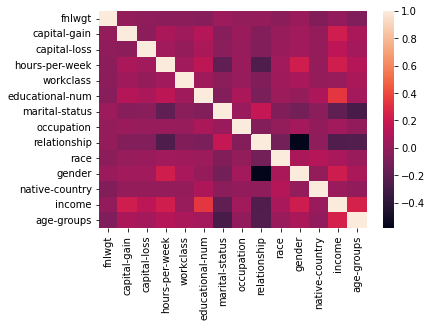

In [17]:
# Heatmap of cross correlations
norm_labeled = pd.concat([num_col, cat_col], axis=1)
cross_cor = norm_labeled.corr()


sns.heatmap(cross_cor)
# correlation of columns with target 'income' (print them)
print(cross_cor['income'])

Provide a pairplot of columns where the correlation with 'income' is higher than 0.1:


* Hint: See [Plot pairwise relationships in a dataset](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
* Hint: Subsample the data for plotting (otherwise it will take forever to render), you can use 1000 random samples
* Hint: Set hue='income' in sns.pairplot




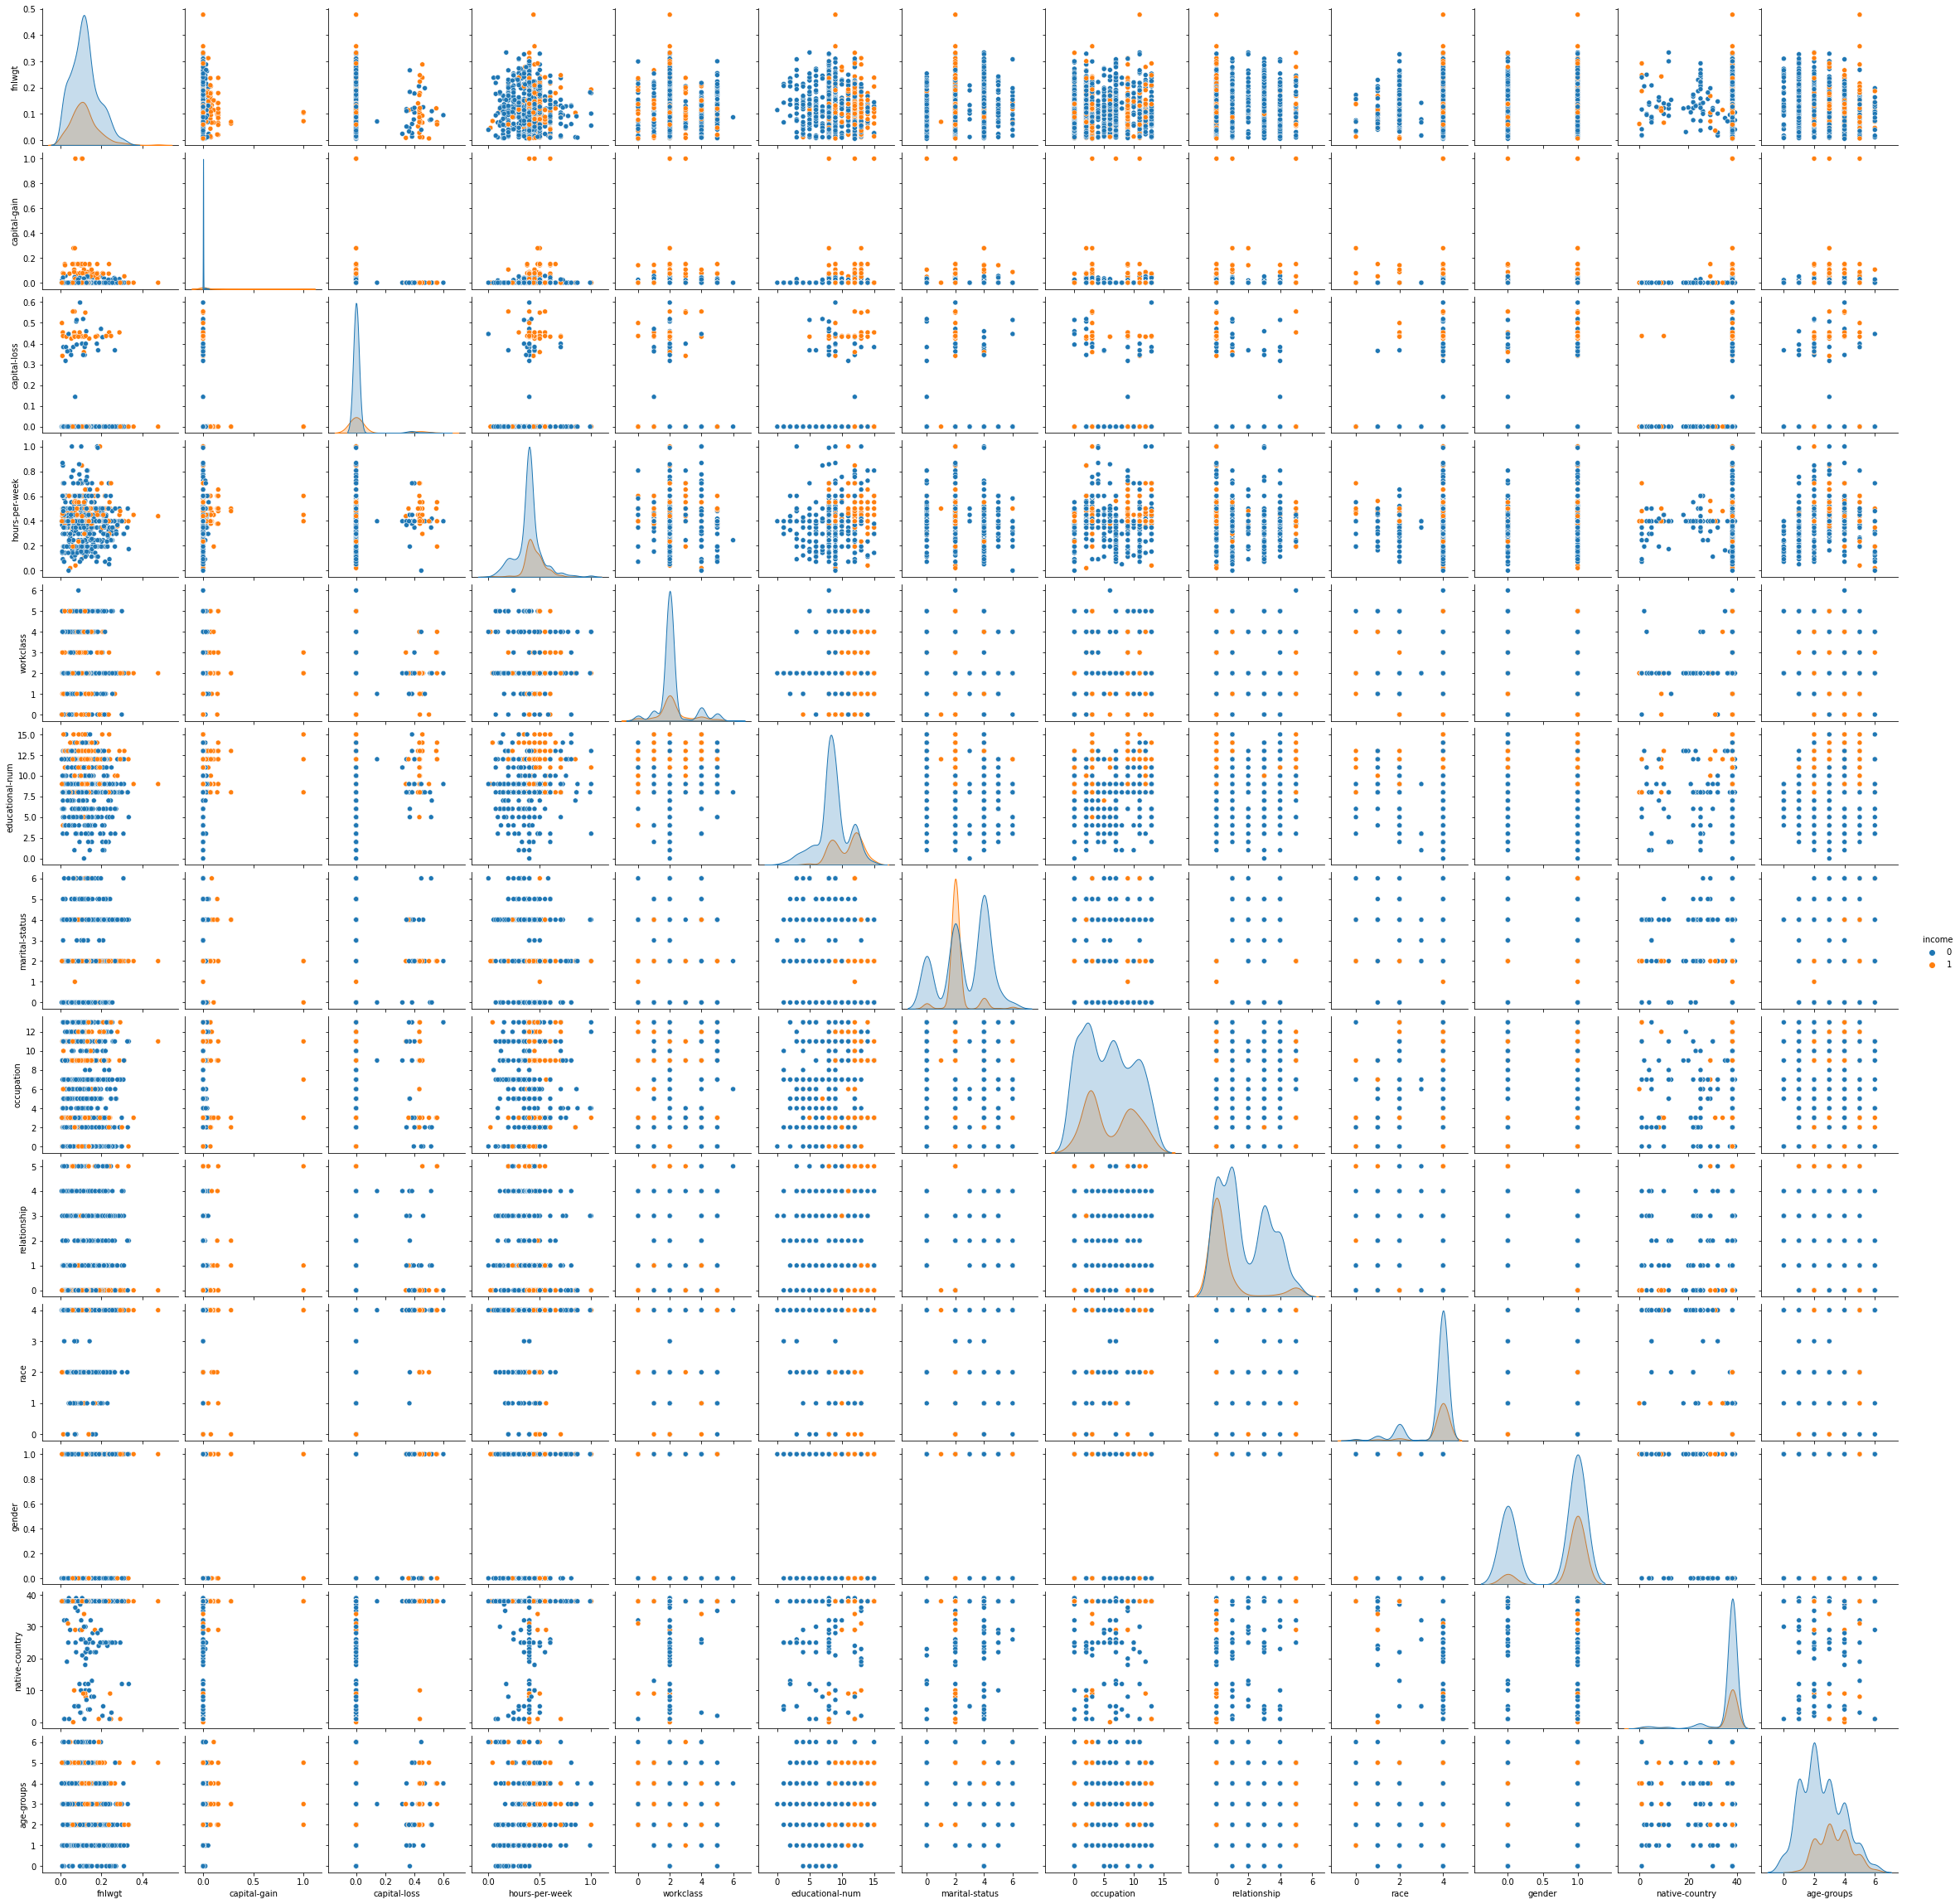

In [18]:
# Pairplot of columns correlated with income
#sns.pairplot(df[(cross_cor['income'] > 0.1).index].sample(1000), hue='income')
sns.pairplot(norm_labeled[(cross_cor['income'] > 0.1).index].sample(1000), hue='income')

Do a [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) of all categorical columns.  
Hint: See [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).
* Print the first five rows of your new dataframe.

In [19]:
# One-hot encoding
#dummies = cat_col.apply(lambda x : pd.get_dummies(x))
dummies = pd.get_dummies(cat_col, columns=cat_col.columns)
print((dummies[:5]))

for i in dummies.columns :
    print(i)

   workclass_0  workclass_1  workclass_2  workclass_3  workclass_4  \
0            0            0            0            0            0   
1            0            0            0            0            1   
2            0            0            1            0            0   
3            0            0            1            0            0   
4            0            0            1            0            0   

   workclass_5  workclass_6  educational-num_0  educational-num_1  \
0            1            0                  0                  0   
1            0            0                  0                  0   
2            0            0                  0                  0   
3            0            0                  0                  0   
4            0            0                  0                  0   

   educational-num_2  ...  native-country_40  income_0  income_1  \
0                  0  ...                  0         1         0   
1                  0  ...   

Split the data into trainset, valset (1000 samples) and testset (10000 samples). Print the shape of your training, validation and test data. 

In [89]:
# Split the data into trainset, valset (1000 samples) and testset (10000 samples)
all_data = pd.concat([num_col, dummies], axis=1)



trainset_og = all_data.sample(n=20000)
valset_og = all_data.drop(trainset_og.index).sample(1000)
#testset = all_data.drop(pd.concat([trainset, valset]).index).sample(5000, weights='fnlwgt')

over_50 = all_data[all_data['income_1'] == 1]
under_50 = all_data[all_data['income_1'] == 0]

trainset = over_50.sample(5000)
over_50 = over_50.drop(trainset.index)

trainset2 = under_50.sample(5000)
under_50 = under_50.drop(trainset2.index)

valset = over_50.sample(500)
over_50 = over_50.drop(valset.index)

valset2 = under_50.sample(500)
under_50 = under_50.drop(valset2.index)

trainset = pd.concat([trainset, trainset2])
valset = pd.concat([valset, valset2])

testset = all_data.drop(pd.concat([trainset, valset]).index).sample(1000)

print(trainset.shape)

print(valset.shape)

print(trainset_og.shape)
print(valset_og.shape)

print(testset.shape)

(10000, 111)
(1000, 111)
(20000, 111)
(1000, 111)
(1000, 111)


Write a function that splits the dataframe into X,Y, where Y can be any of the (possibly one-hot encoded) columns 

In [92]:
# Write a function thats splits the dataframe into X,Y, where Y can be any column
def split_xy(df, colname):
    ycols = [col for col in df.columns if colname in col] # in case of one-hot encoded
    Y = df[ycols]
    X = df.drop(columns=ycols)
    return X, Y


xtrain, ytrain = split_xy(trainset, 'income')
xval, yval = split_xy(valset, 'income')
xtest, ytest = split_xy(testset, 'income')

# not one-hot encoded
#Ytest = all_data['income'][11000:12000]
#Ytrain = complete_df['income'][:10000]

print(xtrain.shape, ytrain.shape)
#print(Ytest.shape)

(10000, 109) (10000, 2)


Write and train a linear classifier with tensorflow keras to predict 'income'


*   Loss: CategoricalCrossentropy





In [93]:
# Train a linear classifier to predict 'income'
def linear_clf(input_shape=(109), n_classes=2):
    inx = Input(input_shape)
    x = layers.Dense(128)(inx)
    x = layers.Dense(n_classes)(x)
    return Model(inx, x)

clf_linear = linear_clf()
clf_linear.summary()

# select loss function and optimizer
loss = losses.CategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=1e-3)
clf_linear.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

trainset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain)).shuffle(xtrain.shape[0]).batch(256)
valset = tf.data.Dataset.from_tensor_slices((xval, yval)).batch(1000)



hist = clf_linear.fit(trainset, validation_data=valset, epochs=100)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 109)]             0         
                                                                 
 dense_34 (Dense)            (None, 128)               14080     
                                                                 
 dense_35 (Dense)            (None, 2)                 258       
                                                                 
Total params: 14,338
Trainable params: 14,338
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 0.5159 - accuracy: 0.7502 - val_loss: 0.4685 - val_accuracy: 0.7760
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.8013 - val_loss: 0.4671 - val_accuracy: 0.7830
Epoch 3/100
40/40 [=================

Print the classification report and confusion matrix 

In [94]:
# Classification report + confusion matrix
pred1 = tf.argmax(clf_linear.predict(xtest), axis=-1)

print(classification_report(ytest['income_1'], pred1))
print(confusion_matrix(ytest['income_1'], pred1))

32/32 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       891
           1       0.32      0.91      0.47       109

    accuracy                           0.78      1000
   macro avg       0.65      0.83      0.66      1000
weighted avg       0.91      0.78      0.82      1000

[[677 214]
 [ 10  99]]


* Now try some other models such as K-nearest neighbors, Random Forest classifier, and Support Vector Machine (code for importing the classifiers is given below)
* Print the classification report and confusion matrix of each classifier 

In [95]:
# Try out non-linear models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# K-nearest neighbors
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xtrain, ytrain['income_1'])

pred_neigh = neigh.predict(xtest)
print(classification_report(ytest['income_1'], pred_neigh))
print(confusion_matrix(ytest['income_1'], pred_neigh))

# Random Forest classifier
RF = RandomForestClassifier()
RF.fit(xtrain, ytrain['income_1'])

pred_RF = RF.predict(xtest)
print(classification_report(ytest['income_1'], pred_RF))
print(confusion_matrix(ytest['income_1'], pred_RF))

# Support Vector Machine
SVC = SVC()
SVC.fit(xtrain, ytrain['income_1'])

pred_SVC = SVC.predict(xtest)
print(classification_report(ytest['income_1'], pred_SVC))
print(confusion_matrix(ytest['income_1'], pred_SVC))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       891
           1       0.29      0.83      0.43       109

    accuracy                           0.75      1000
   macro avg       0.63      0.79      0.63      1000
weighted avg       0.90      0.75      0.80      1000

[[663 228]
 [ 18  91]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       891
           1       0.34      0.84      0.49       109

    accuracy                           0.81      1000
   macro avg       0.66      0.82      0.68      1000
weighted avg       0.91      0.81      0.84      1000

[[714 177]
 [ 17  92]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       891
           1       0.32      0.85      0.46       109

    accuracy                           0.79      1000
   macro avg       0.65      0.82      0.67      1000
weighted avg       0.91     

Train a neural network for 50 epochs with:
* An input layer
* Two dense layers, where between the two dense layers is a dropout layer
* Input -> Dense -> Dropout-> Dense

* Loss: CategoricalCrossentropy
* Metrics: 'accuracy'

In [96]:
# Try out non-linear NN

def nonlinear_clf(input_shape=(109), n_classes=2):
    inx = Input(input_shape)
    x = layers.Dense(256, activation='relu')(inx)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(n_classes)(x)
    return Model(inx, x)

clf_nonlinear = nonlinear_clf()
clf_nonlinear.summary()
loss = losses.CategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=1e-3)
clf_nonlinear.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

# callback for saving model
cpt = callbacks.ModelCheckpoint('cpt/nonlinclf', save_best_only=True)

hist2 = clf_nonlinear.fit(trainset, validation_data=valset, epochs=100, callbacks=[cpt])

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 109)]             0         
                                                                 
 dense_36 (Dense)            (None, 256)               28160     
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                16448     
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 2)                 130       
                                                                 
Total params: 44,738
Trainable params: 44,738
Non-trainabl

Print the classification report and confusion matrix 

In [97]:
clf2 = tf.keras.models.load_model('cpt/nonlinclf')
pred_nn = tf.argmax(clf2.predict(xtest), axis=-1)
print(classification_report(ytest['income_1'], pred_nn))
print(confusion_matrix(ytest['income_1'], pred_nn))

32/32 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       891
           1       0.35      0.87      0.49       109

    accuracy                           0.81      1000
   macro avg       0.66      0.83      0.69      1000
weighted avg       0.91      0.81      0.84      1000

[[711 180]
 [ 14  95]]


In [98]:
xtrain_og, ytrain_og = split_xy(trainset_og, 'income')
xval_og, yval_og = split_xy(valset_og, 'income')


In [99]:
trainset_og = tf.data.Dataset.from_tensor_slices((xtrain_og, ytrain_og)).shuffle(xtrain.shape[0]).batch(256)
valset_og = tf.data.Dataset.from_tensor_slices((xval_og, yval_og)).batch(1000)


loss = losses.CategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=1e-4)
clf_nonlinear.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

cpt2 = callbacks.ModelCheckpoint('cpt/nonlinclf_og', save_best_only=True)

hist3 = clf_nonlinear.fit(trainset_og, validation_data=valset_og, epochs=100, callbacks=[cpt2])

Epoch 1/100
79/79 [==============================] - 2s 15ms/step - loss: 0.3832 - accuracy: 0.8307 - val_loss: 0.3172 - val_accuracy: 0.8680
Epoch 2/100
79/79 [==============================] - 1s 13ms/step - loss: 0.3442 - accuracy: 0.8493 - val_loss: 0.3106 - val_accuracy: 0.8690
Epoch 3/100
79/79 [==============================] - 1s 13ms/step - loss: 0.3344 - accuracy: 0.8499 - val_loss: 0.3084 - val_accuracy: 0.8700
Epoch 4/100
79/79 [==============================] - 1s 13ms/step - loss: 0.3320 - accuracy: 0.8501 - val_loss: 0.3062 - val_accuracy: 0.8680
Epoch 5/100
79/79 [==============================] - 1s 13ms/step - loss: 0.3257 - accuracy: 0.8529 - val_loss: 0.3044 - val_accuracy: 0.8690
Epoch 6/100
79/79 [==============================] - 2s 21ms/step - loss: 0.3241 - accuracy: 0.8530 - val_loss: 0.3037 - val_accuracy: 0.8640
Epoch 7/100
79/79 [==============================] - 1s 13ms/step - loss: 0.3206 - accuracy: 0.8531 - val_loss: 0.3026 - val_accuracy: 0.8690
Epoch 

In [100]:
clf2 = tf.keras.models.load_model('cpt/nonlinclf_og')
pred_nn = tf.argmax(clf2.predict(xtest), axis=-1)
print(classification_report(ytest['income_1'], pred_nn))
print(confusion_matrix(ytest['income_1'], pred_nn))

32/32 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       891
           1       0.53      0.64      0.58       109

    accuracy                           0.90      1000
   macro avg       0.74      0.79      0.76      1000
weighted avg       0.91      0.90      0.90      1000

[[828  63]
 [ 39  70]]


Did the non-linear classifiers improve over the linear classifier? Interprete the results.